m = 1.5
Fitting model on a small sub-sample of the data
done in 1.835s.
Predicting color indices on the full image (FCM)
done in 0.296s.
m = 2
Fitting model on a small sub-sample of the data
done in 1.161s.
Predicting color indices on the full image (FCM)
done in 0.259s.
m = 3
Fitting model on a small sub-sample of the data
done in 1.367s.
Predicting color indices on the full image (FCM)
done in 0.262s.
m = 4
Fitting model on a small sub-sample of the data
done in 1.526s.
Predicting color indices on the full image (FCM)
done in 0.288s.
m = 6
Fitting model on a small sub-sample of the data
done in 1.536s.
Predicting color indices on the full image (FCM)
done in 0.294s.
m = 10
Fitting model on a small sub-sample of the data
done in 1.711s.
Predicting color indices on the full image (FCM)
done in 0.282s.


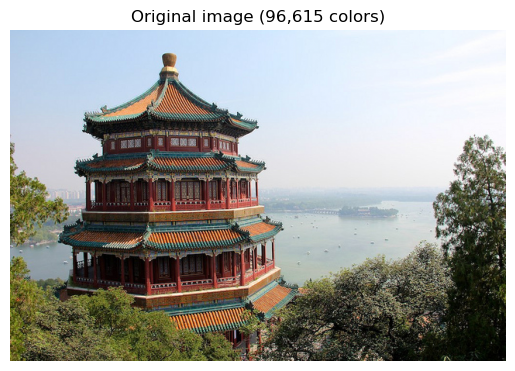

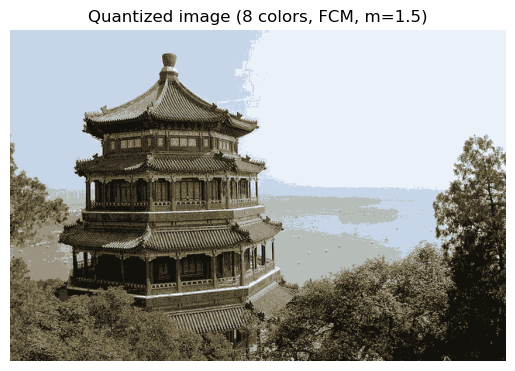

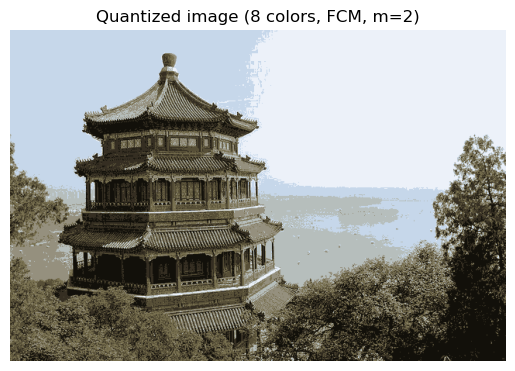

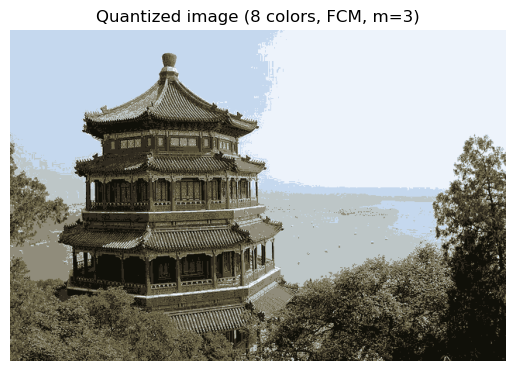

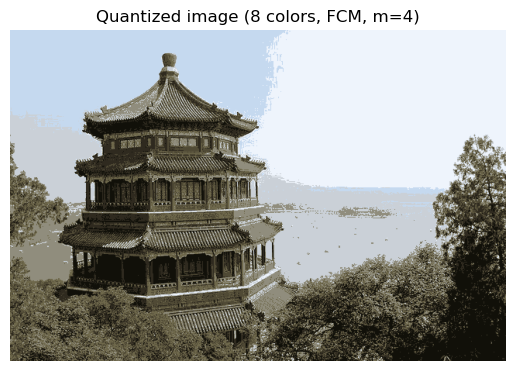

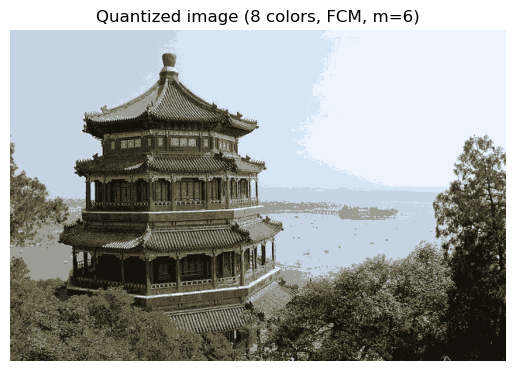

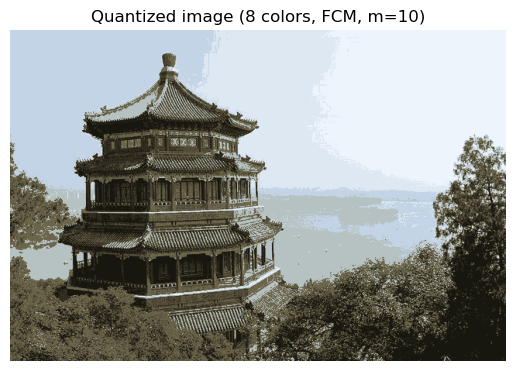

In [10]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from fcmeans import FCM
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

n_colors = 8
m_grid = [1.5, 2, 3, 4, 6,10]
# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

for i,m in enumerate(m_grid):
    print("m =", m)
    
    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0, n_samples=10_000)
    fcm = FCM(n_clusters=n_colors , m = m)
    fcm.fit(image_array_sample)
    print(f"done in {time() - t0:0.3f}s.")
    
    print("Predicting color indices on the full image (FCM)")
    t0 = time()
    labels_fcm = fcm.predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")
    
    plt.figure(i+2)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, FCM, m={m})")
    plt.imshow(recreate_image(fcm.centers, labels_fcm, w, h))
